# Exploratory Data Analysis (EDA)

Project Overview

This project demonstrates the process of using EDA to clean a dataset, understand the variables, and analyze the relationships between variables.

##What is EDA?

EDA is a step in the data analysis process, where a number of techniques are utilized to better understand the dataset being used.

## Objectives

*   Explore dataset to determine the main features or characteristics that have the most impact on blood pressure (BP).
*   Data source: Population health-related survey dataset 


<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>


1. [Import Data](#import)
2. [Descriptive Statistical Analysis](#dsa)
3. [Correlation](#corr)










## Import Data <a name="import"></a>


Import libraries:


In [ ]:
# Pandas is a library for data management, manipulation, and analysis 
# Matplotlib is a library for making visualizations
# Seaborn is a higher-level interface to Matplotlib that can be used to simplify graphing
# Numpy is a library for working with arrays of data 

%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Load the data and store it in dataframe `df`:


In [ ]:
# Read in data and limit dataset to only columns of interest
url = "https://raw.githubusercontent.com/dandersonghub/EDA/main/nhanes.csv"
df = pd.read_csv(url)

# Drop all columns except those listed below
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "BMXWT","SMQ020",]
df = df[vars]


# Change column names for clarity
df.rename(columns={'BPXSY1':'BP', 'RIDAGEYR': 'AGE', 'RIAGENDR':'GENDER','RIDRETH1': 'RACE', 
                   'DMDEDUC2':'EDUCATION', 'BMXBMI': 'BMI', 'BMXWT':'WEIGHT', 'SMQ020': 'CIGSMK'}, inplace=True)
df

,BP,AGE,GENDER,RACE,EDUCATION,BMI,WEIGHT,CIGSMK
0,128.0,62,1,3,5.0,27.8,94.8,1
1,146.0,53,1,3,3.0,30.8,90.4,1
2,138.0,78,1,3,3.0,28.8,83.4,1
3,132.0,56,2,3,5.0,42.4,109.8,2
4,100.0,42,2,4,4.0,20.3,55.2,2
...,...,...,...,...,...,...,...,...
5730,112.0,76,2,3,3.0,21.5,59.1,1
5731,118.0,26,1,3,5.0,33.8,112.1,2
5732,154.0,80,2,3,4.0,31.0,71.7,1
5733,104.0,35,1,3,1.0,26.0,78.2,1


Dataset is limited to 8 columns of data that represents demographic and health-related data for survey respondents. 

## Descriptive Statistical Analysis <a name="dsa"></a> 

In [ ]:
# Review list of data types for each column
print(df.dtypes)

BP           float64
AGE            int64
GENDER         int64
RACE           int64
EDUCATION    float64
BMI          float64
WEIGHT       float64
CIGSMK         int64
dtype: object


Handling Missing Values

In [ ]:
#Evaluating for Missing Data
#Use function to identify missing values 
missing_data = df.isnull()

# Identify all missings in each column
# "True" indicates missing values 
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 


**Dataset Missing Values Summary**

Based on the summary above, this dataset contains 5,735 rows and 8 columns of data, 4 columns contain missing data.

<ol>
    <li>"BP": 334 missing data</li>
    <li>"EDUCATION": 261 missing data</li>
    <li>"BMI": 73 missing data</li>
    <li>"WEIGHT": 69 missing data</li>
</ol>

<h3 id="deal_missing_values">Example ways to deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>

Drop data

In [ ]:
# Drop all rows that do not have a value for the column "WEIGHT"
# 69 Rows will be dropped from "WEIGHT", leaving 5,662 rows of data 
df.dropna(subset=["WEIGHT"])


,BP,AGE,GENDER,RACE,EDUCATION,BMI,WEIGHT,CIGSMK
0,128.0,62,1,3,5.0,27.8,94.8,1
1,146.0,53,1,3,3.0,30.8,90.4,1
2,138.0,78,1,3,3.0,28.8,83.4,1
3,132.0,56,2,3,5.0,42.4,109.8,2
4,100.0,42,2,4,4.0,20.3,55.2,2
...,...,...,...,...,...,...,...,...
5730,112.0,76,2,3,3.0,21.5,59.1,1
5731,118.0,26,1,3,5.0,33.8,112.1,2
5732,154.0,80,2,3,4.0,31.0,71.7,1
5733,104.0,35,1,3,1.0,26.0,78.2,1


In [ ]:
# Review summary statistics for columns in dataset
df.describe()

,BP,AGE,GENDER,RACE,EDUCATION,BMI,WEIGHT,CIGSMK
count,5735.000000,5735.000000,5735.000000,5735.000000,5474.000000,5662.000000,5666.000000,5735.000000
mean,125.084614,48.052310,1.518919,3.042371,3.441725,29.382197,81.342676,1.607149
std,17.934551,18.431011,0.499686,1.296793,1.309700,7.095921,21.764409,0.571975
min,82.000000,18.000000,1.000000,1.000000,1.000000,14.500000,32.400000,1.000000
25%,114.000000,32.000000,1.000000,2.000000,3.000000,24.300000,65.900000,1.000000
50%,124.000000,48.000000,2.000000,3.000000,4.000000,28.300000,78.200000,2.000000
75%,134.000000,63.000000,2.000000,4.000000,4.750000,33.000000,92.700000,2.000000
max,236.000000,80.000000,2.000000,5.000000,9.000000,67.300000,198.900000,9.000000


Replace Data

In [ ]:
# Impute missing values for the outcome column "BP"
# Replace missings in the column "BP" with the mean
# Calculate the mean value for the "BP" column
avg_BP = df["BP"].mean(axis=0)
print("Average BP:", avg_BP)

Average BP: 125.08461396037771


In [ ]:
# Replace Missings or "NaN" with mean value in "BP" column
df["BP"].replace(np.nan, avg_BP, inplace=True)

In [ ]:
# Display summary statistics
df["BP"].describe()

count    5735.000000
mean      125.084614
std        17.934551
min        82.000000
25%       114.000000
50%       124.000000
75%       134.000000
max       236.000000
Name: BP, dtype: float64

In [ ]:
# Impute missing "BMI" values 
# Replace missings in the column "BMI" with the mean
# Calculate the mean value for the "BMI" column
avg_BMI = df["BMI"].mean(axis=0)
print("Average BMI:", avg_BMI)

Average BMI: 29.382197103497


In [ ]:
# Replace missings or "NaN" with mean value in "BP" column
df["BMI"].replace(np.nan, avg_BMI, inplace=True)
df["BMI"].describe()

count    5735.000000
mean       29.382197
std         7.050607
min        14.500000
25%        24.400000
50%        28.400000
75%        33.000000
max        67.300000
Name: BMI, dtype: float64

In [ ]:
# Replace missings in "EDUCATION" column with most frequent value (4)
df['EDUCATION'].value_counts().idxmax()

4.0

In [ ]:
df["EDUCATION"].replace(np.nan, 4, inplace=True)
df["EDUCATION"].describe()

count    5735.000000
mean        3.467132
std         1.284826
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         9.000000
Name: EDUCATION, dtype: float64

## Correlation <a name="corr"></a>



In [ ]:
# Calculate the correlation between variables 
pd.set_option('display.max_columns', None)
df.corr()

,BP,AGE,GENDER,RACE,EDUCATION,BMI,WEIGHT,CIGSMK
BP,1.000000,0.456624,-0.097638,-0.008128,-0.142900,0.129674,0.117798,-0.093965
AGE,0.456624,1.000000,-0.014613,-0.042209,-0.140115,0.059597,-0.010378,-0.139940
GENDER,-0.097638,-0.014613,1.000000,-0.027209,0.028226,0.081811,-0.230864,0.177643
RACE,-0.008128,-0.042209,-0.027209,1.000000,0.308585,-0.155929,-0.065482,0.006692
EDUCATION,-0.142900,-0.140115,0.028226,0.308585,1.000000,-0.052961,0.043743,0.091573
BMI,0.129674,0.059597,0.081811,-0.155929,-0.052961,1.000000,0.884133,-0.021695
WEIGHT,0.117798,-0.010378,-0.230864,-0.065482,0.043743,0.884133,1.000000,-0.091926
CIGSMK,-0.093965,-0.139940,0.177643,0.006692,0.091573,-0.021695,-0.091926,1.000000


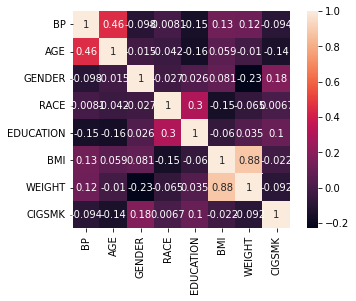

In [ ]:
# Create Heatmap to visualize correlation between variables
# Specifically, we can visualize how "BP" is related to the other variables
import matplotlib.pyplot as plt
%matplotlib inline 
corr = df.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

Based on a visual review of the two charts above, we would like to further investigate the correlations between "AGE", and "BMI" with "BP". They are the two variables with the strongest correlations with "BP". 

####Correlation & P-value

In [ ]:
# Calculate Pearson Correlation Coefficient and P-value between 'AGE' and 'BP'
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['AGE'], df['BP'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.4566243432666689  with a P-value of P = 1.8337318725830127e-293


Since the p-value is < 0.001, the correlation between "AGE" and "BP" is statistically significant, with a moderate linear relationship (~0.456).

In [ ]:
# Calculate Pearson Correlation Coefficient and P-value between 'BMI' and 'BP'
pearson_coef, p_value = stats.pearsonr(df['BMI'], df['BP'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.128413329988114  with a P-value of P = 1.6222184363035764e-22


Since the p-value is < 0.001, the correlation between "BMI" and "BP" is statistically significant, although the linear relationship is very weak (~0.128).

####Continuous Numerical Variables



Plot continuous numerical variables to help understand the linear relationship between individual variables and blood pressure "BP". 

(0.0, 243.7)

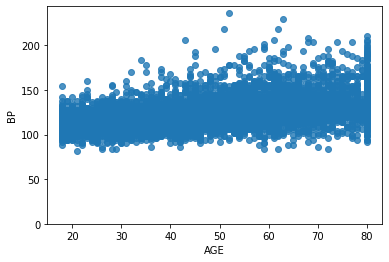

In [ ]:
# "AGE" as potential predictor variable of "BP"
sns.regplot(x="AGE", y="BP", data=df)
plt.ylim(0,)

In [ ]:
df[["AGE", "BP"]].corr()

,AGE,BP
AGE,1.000000,0.456624
BP,0.456624,1.000000


There is a moderate correlation between the variable "AGE" and "BP". "AGE" could potentially be a predictor of "BP"

(0.0, 243.7)

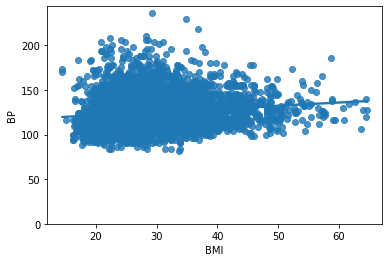

In [ ]:
# BMI as potential predictor variable of Blood Pressure
sns.regplot(x="BMI", y="BP", data=df)
plt.ylim(0,)

In [ ]:
df[["BMI", "BP"]].corr()

,BMI,BP
BMI,1.000000,0.135201
BP,0.135201,1.000000


There is a weak correlation between the variable "BMI" and "BP". "BMI" would not be a good predictor of "BP".

####Categorical Variables

Plot categorical variables using boxplots to visualize distributions

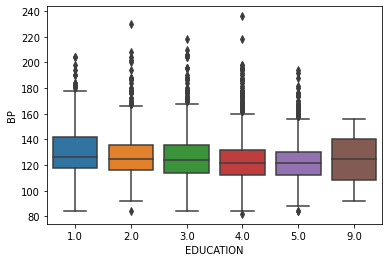

In [ ]:
sns.boxplot(x="EDUCATION", y="BP", data=df)

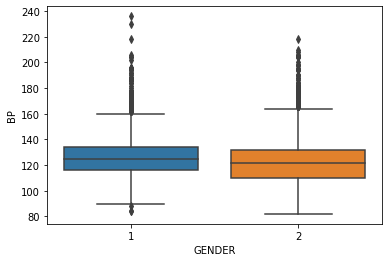

In [ ]:
sns.boxplot(x="GENDER", y="BP", data=df)

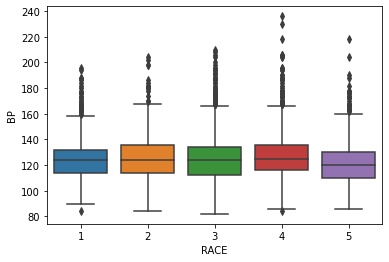

In [ ]:
sns.boxplot(x="RACE", y="BP", data=df)

The categories for "EDUCATION", "GENDER", and "RACE" all have significant overlap so they would not be a good predictors of "BP".

##Conclusion

Performing Exploratory Data Analysis (EDA) on this dataset has given us a better idea of what our data looks like and which variables are important to take into account when predicting Blood Pressure (BP). 

Based on this analysis, the variable 'AGE' has been shown to significantly affect our target variable 'BP' and should be considered when performing predictive modeling.